# Classificação de objetos do conjunto de dados CIFAR-10

## 1 - Importando bibliotecas

In [2]:
from keras.datasets import cifar10 # método para baixar dataset cifar-10 via keras
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization, Dropout
from keras import regularizers
from keras.optimizers import rmsprop, SGD, Adam
from keras.layers.advanced_activations import LeakyReLU
import keras
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

Using TensorFlow backend.


## 2 - Download do dataset CIFAR-10 via keras

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## 3 - Mostre o SHAPE dos dataset de treino e de teste

In [4]:
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


## 4 - Quantos canais as imagens deste dataset apresentam? Quantas classes diferentes esse dataset apresenta?

## Quantos canais as imagens deste dataset apresentam?
R:3
## Quantas classes diferentes esse dataset apresenta?
R:10

## 5 - Visualizando o dataset

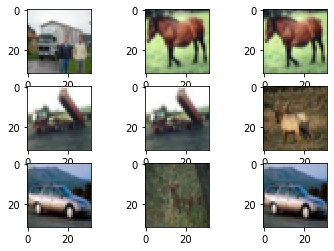

In [5]:
import random
import math

random_indexes = [random.randrange(1,17,1) for _ in range(9)]

num_total = len(random_indexes)

rows = int(math.sqrt(num_total))
cols = rows

for idx, i in enumerate(random_indexes):
    subplot_index = ''+str(rows)+str(cols)+str(idx+1)
    plt.subplot(int(subplot_index))
    plt.imshow(X_train[i], cmap='gray')

plt.show()

In [6]:
# Apenas transforma em tipo float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normaliza os dados em 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

## 6 - É necessário fazer um *reshape* nas imagens do dataset?

R: Não, porque a CNN irá receber os dados no formato 32x32x3

## 7 - Transforme os rótulos (*labels*) de inteiros para *one-hot encoding*

In [7]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

## 8 - Imprima 10 amostras dos rótulos de treino em *one-hot encoding*

In [8]:
y_train_one_hot[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## 9 - Crie o seu modelo de rede convolucional

### Lembre-se: O prazo para esta atividade será longo, visto que iremos apresentar técnicas ao longo do curso que ajudam a amelhorar a acurácia do seu modelo. Mas vocês já podem experimentar treinar o modelo que vocês arquitetarem para tentar uma boa taxa de acurácia no conjunto de dados de validação.

In [11]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)

In [8]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

### 10 - Escolha o tamanho do *batch* e o número de épocas para treinar o modelo :

In [12]:
batch_size = 64
epochs = 20
num_classes = 10

## 11 - Compile o modelo

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

## 12 - Instancie o modelo

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

## 13 - Treine o modelo e armazene o histórico de treinamento para depois analisar as curva de acurácia e erro durante aprendizado 

In [23]:
history = model.fit(train_X, train_label, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(valid_X, valid_label))

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 - 293s - loss: 1.6997 - accuracy: 0.4220 - val_loss: 1.3566 - val_accuracy: 0.5212
Epoch 2/20
 - 299s - loss: 1.1617 - accuracy: 0.5870 - val_loss: 0.9217 - val_accuracy: 0.6694
Epoch 3/20
 - 306s - loss: 0.9741 - accuracy: 0.6577 - val_loss: 0.8888 - val_accuracy: 0.6850
Epoch 4/20
 - 313s - loss: 0.8689 - accuracy: 0.6952 - val_loss: 0.7536 - val_accuracy: 0.7330
Epoch 5/20
 - 280s - loss: 0.7996 - accuracy: 0.7222 - val_loss: 0.7065 - val_accuracy: 0.7505
Epoch 6/20
 - 288s - loss: 0.7244 - accuracy: 0.7474 - val_loss: 0.6970 - val_accuracy: 0.7570
Epoch 7/20
 - 313s - loss: 0.6823 - accuracy: 0.7608 - val_loss: 0.6541 - val_accuracy: 0.7697
Epoch 8/20
 - 295s - loss: 0.6318 - accuracy: 0.7812 - val_loss: 0.6437 - val_accuracy: 0.7766
Epoch 9/20
 - 308s - loss: 0.5965 - accuracy: 0.7947 - val_loss: 0.6063 - val_accuracy: 0.7967
Epoch 10/20
 - 308s - loss: 0.5573 - accuracy: 0.8059 - val_loss: 0.5534 - val_accuracy: 0.8134

In [24]:
test_eval = model.evaluate(X_test, y_test_one_hot, verbose=0)

In [25]:
print('Test accuracy:', test_eval[1])

Test accuracy: 0.8402000069618225


## 14 - Plote os gráficos de acurácia e perda (*loss*) de treino e teste :

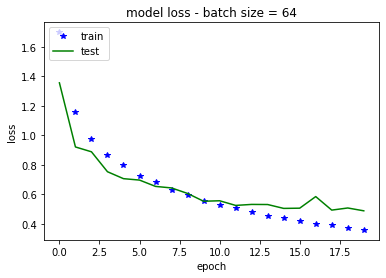

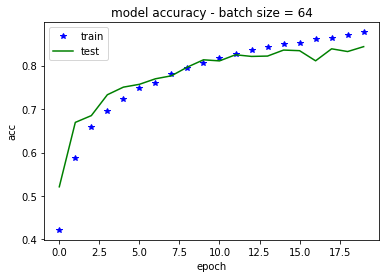

In [26]:
plt.figure()
plt.plot(history.history['loss'],'b*',)
plt.plot(history.history['val_loss'],'g')
plt.title('model loss - batch size = '+str(batch_size))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.figure()
plt.plot(history.history['accuracy'],'b*',)
plt.plot(history.history['val_accuracy'],'g')
plt.title('model accuracy - batch size = '+str(batch_size))
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')